## 一般形式

In [1]:
import sympy
sympy.init_printing()
import numpy as np


### Hessian矩阵

In [2]:
x, y, z= sympy.symbols("x, y, z")
f = sympy.Function("f")(x, y, z)
f_hessian = [[f.diff(x_, y_) for x_ in (x, y, z)] for y_ in (x, y, z)]
H = sympy.Matrix(f_hessian)
H

⎡   2                  2                  2             ⎤
⎢  ∂                  ∂                  ∂              ⎥
⎢ ───(f(x, y, z))   ─────(f(x, y, z))  ─────(f(x, y, z))⎥
⎢   2               ∂y ∂x              ∂z ∂x            ⎥
⎢ ∂x                                                    ⎥
⎢                                                       ⎥
⎢   2                  2                  2             ⎥
⎢  ∂                  ∂                  ∂              ⎥
⎢─────(f(x, y, z))   ───(f(x, y, z))   ─────(f(x, y, z))⎥
⎢∂y ∂x                 2               ∂z ∂y            ⎥
⎢                    ∂y                                 ⎥
⎢                                                       ⎥
⎢   2                  2                  2             ⎥
⎢  ∂                  ∂                  ∂              ⎥
⎢─────(f(x, y, z))  ─────(f(x, y, z))   ───(f(x, y, z)) ⎥
⎢∂z ∂x              ∂z ∂y                 2             ⎥
⎣                                       ∂z              ⎦

### 用矩阵表达二次方形式

In [3]:
a, b, c, d, e, f= sympy.symbols("a, b, c, d, e, f")
v = sympy.Matrix([x, y, z])
m = sympy.Matrix([[a, b, c], [b, d, e], [c, e, f]])
sympy.expand(v.T * m * v)

⎡   2                          2                2⎤
⎣a⋅x  + 2⋅b⋅x⋅y + 2⋅c⋅x⋅z + d⋅y  + 2⋅e⋅y⋅z + f⋅z ⎦

### 二次方近似的矩阵形式

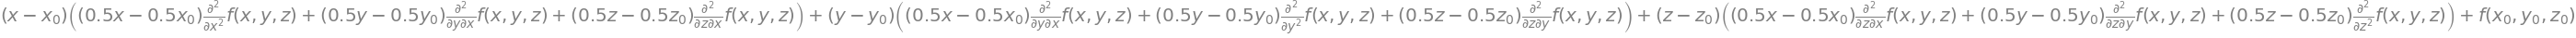

In [4]:
x0, y0, z0 = sympy.symbols("x0, y0, z0")
v = sympy.Matrix([x - x0, y - y0, z - z0])
f_grad = sympy.Matrix([f.diff(x), f.diff(y), f.diff(z)])

f0 = sympy.Function("f")(x0, y0, z0)
f_grad0 = f_grad.subs({"x":x0, "y":y0, "z":z0})
H0 = H.subs({"x":x0, "y":y0, "z":z0})
Q = f0 + (v.T * f_grad0)[0] + (1/2 * v.T * H * v)[0]
Q

## $f(x,y)= e^{\frac x 2}\sin y$，求其在点$(0, \frac \pi 2)$处的二次方近似

In [5]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [6]:
f = lambda X: np.exp(X[0] / 2) * np.sin(X[1])

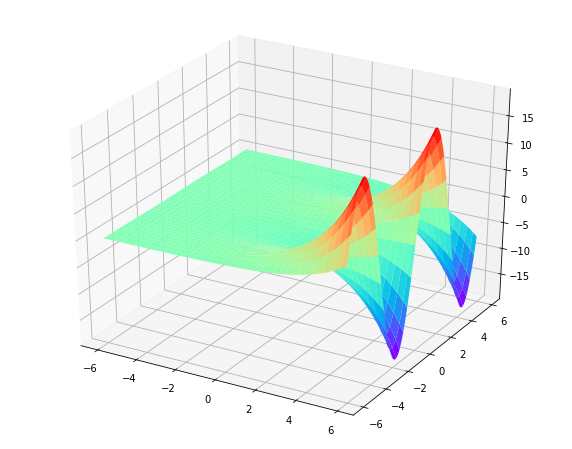

In [7]:
xn = np.arange(-6, 6, 0.1)
yn = np.arange(-6, 6, 0.1)
xxn, yyn = np.meshgrid(xn, yn)
XX = np.c_[xxn.ravel(), yyn.ravel()]
Z = np.array([f(xy) for xy in XX]).reshape(xxn.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xxn, yyn, Z, cmap='rainbow')
plt.show()

### 解析法

In [8]:
x, y = sympy.symbols("x, y")
f = sympy.exp(x/2) * sympy.sin(y)
f_grad = sympy.Matrix([f.diff(x), f.diff(y)])
f_grad

⎡ x       ⎤
⎢ ─       ⎥
⎢ 2       ⎥
⎢ℯ ⋅sin(y)⎥
⎢─────────⎥
⎢    2    ⎥
⎢         ⎥
⎢ x       ⎥
⎢ ─       ⎥
⎢ 2       ⎥
⎣ℯ ⋅cos(y)⎦

In [9]:
f_hessian = [[f.diff(x_, y_) for x_ in (x, y)] for y_ in (x, y)]
hessian = sympy.Matrix(f_hessian)
hessian

⎡ x          x        ⎤
⎢ ─          ─        ⎥
⎢ 2          2        ⎥
⎢ℯ ⋅sin(y)  ℯ ⋅cos(y) ⎥
⎢─────────  ───────── ⎥
⎢    4          2     ⎥
⎢                     ⎥
⎢ x                   ⎥
⎢ ─           x       ⎥
⎢ 2           ─       ⎥
⎢ℯ ⋅cos(y)    2       ⎥
⎢─────────  -ℯ ⋅sin(y)⎥
⎣    2                ⎦

In [10]:
f0 = f.subs({"x":0, "y":sympy.pi / 2})
f_grad0 = f_grad.subs({"x":0, "y":sympy.pi / 2})
H0 = hessian.subs({"x":0, "y":sympy.pi / 2})

#### 在点$(0, \frac \pi 2)$处的二次方表达式

In [11]:
v = sympy.Matrix([x - 0, y - sympy.pi / 2])
Q = f0 + (v.T * f_grad0)[0] + (1/2 * v.T * H0 * v)[0]
sympy.simplify(Q)

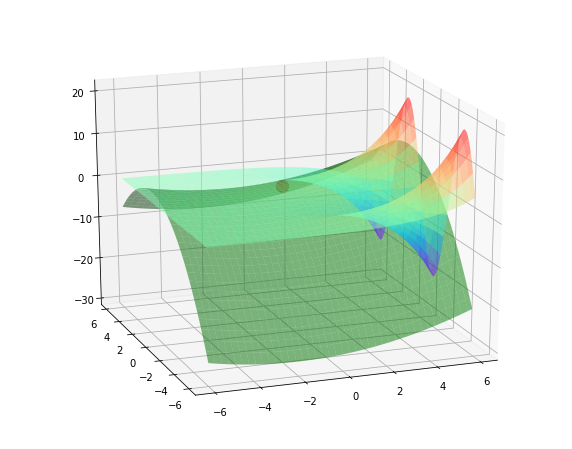

In [12]:
x0, y0, z0 = [np.array([0.0]), np.array([np.pi/2]), np.array([1.0])]
Q = lambda X: 0.125 * X[0]**2 + X[0] / 2 - \
                ((X[1] / 2 - 0.25 * np.pi) * (2 * X[1] - np.pi)) / 2 + 1 
QZ = np.array([Q(xy) for xy in XX]).reshape(xxn.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xxn, yyn, Z, cmap="rainbow", alpha=0.5)
ax.plot_surface(xxn, yyn, QZ, color='g', alpha=0.5)
ax.scatter(x0, y0, z0, color='r', s=150)
ax.view_init(elev=20, azim=250)
plt.show()

In [13]:
# 交互式可视化
import ipyvolume as ipv
import ipyvolume.pylab as plt3d

plt3d.figure(width=1000, height=600)
plt3d.plot_surface(xxn, Z, yyn, color="green")
plt3d.plot_surface(xxn, QZ, yyn,  color="red")
plt3d.scatter(x0, z0, y0, size=8, marker="sphere", color="blue")

plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()